In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *

In [37]:
train_data = get_data()

x_train = train_data["Avg_Temp_Pre_Day"].to_numpy()
x_train = np.reshape(x_train, (np.shape(x_train)[0], 1))
y_train = train_data["Avg_Temp"].to_numpy()
y_train = np.reshape(y_train, (np.shape(y_train)[0], 1))
x_train = standardize(x_train, x_train)
y_train = standardize(y_train, y_train)

network = NeuralNetwork(x_train[0:7].T, y_train[7], 2)

In [38]:
y_output = np.zeros(len(x_train)-7)
y_pred = np.zeros(len(x_train)-7)
for i in range(len(x_train)-7):
    network.train(x_train[i:i+7].T, y_train[i+7])
    y_output[i] = y_train[i+7]
    y_pred[i] = network.output[0]

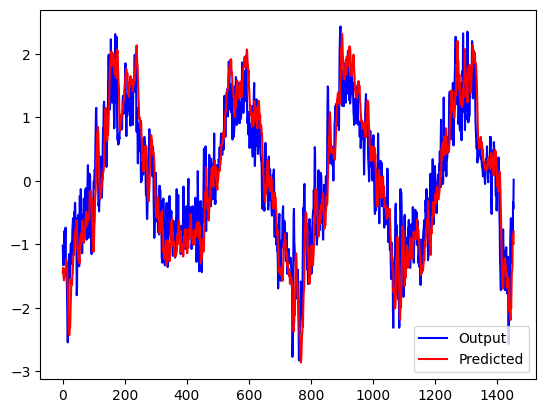

In [39]:
x = np.arange(len(x_train)-7)
plt.plot(x, y_output, 'b', label="Output")
plt.plot(x, y_pred, 'r', label="Predicted")
plt.legend()
plt.show()

In [40]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.269149967689984
MAE: 0.4082243982512754
